# Data Preparation and Feature Engineering Tutorial

Notebook from [Andrew Berry](https://drive.google.com/file/d/1In_FOHxnPUeokSrcBq0lo1R6mGQ_6hEM/view).

In this tutorial, we will discuss data preparation and feature engineering techniques within the ML process.

## Data Preparation

The main goal of this phase is to prepare the data for exploratory data analysis, inferential analysis, or prediction (modeling). In other words, we're making sure our data is in good shape, we have treated our missing values, dealt with weird data, and cleaned it up.

In this notebook, we will cover three common data preparation techniques:
1. Outlier Detection
1. Handling Missing Values
1. Variable Transformation

---
## 1. Outlier Detection

- Data can have incorrect values (human error, system error)
- **Outlier**: an observation point that is distant from other observations
- Outliers are helpful for pointing out what can be wrong
- It is sometimes obvious how to deal with errors, but often it requires domain-specific knowledge to determine the proper course of action.

> Note: Before simply deleting outliers, determine if this is needed. It depends on your use case and if the outliers are important (e.g., fraud detection).

### Outlier Detection: demo
- Docs: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html
- [Example source](https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba)

In [1]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

boston = load_boston()
X = boston.data
y = boston.target
columns = boston.feature_names

#create the dataframe
boston_df = pd.DataFrame(boston.data)
boston_df.columns = columns
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Boston real-estate data:

- CRIM per capita crime rate by town

- ZN proportion of residential land zoned for lots over 25,000 sq.ft.

- INDUS proportion of non-retail business acres per town

- CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

- NOX nitric oxides concentration (parts per 10 million)

- RM average number of rooms per dwelling

- AGE proportion of owner-occupied units built prior to 1940

- DIS weighted distances to five Boston employment centres

- RAD index of accessibility to radial highways

- TAX full-value property-tax rate per $10,000

- PTRATIO pupil-teacher ratio by town

- B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

- LSTAT % lower status of the population

- MEDV (target variable) Median value of owner-occupied homes in $1000’s



**Method 1: Summary of the data**

- Use your intuition
- Ask a domain expert

Does anything stand out to you?

Which summary statistics (mean, std, etc.) did you find yourself checking?

In [2]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


Notice:
- CRIM and DIS max, B min
- ZN, INDUS, AGE, LSTAT are percentages

**Method 2: Visualizing a Single Variable**

Boxplots are good for visualzing distributions (skewness) and identifying outliers.

sns.boxplot has a parameter `whis=1.5` that controls the whiskers. For very skewed data, use a higher value of `whis`.
> `whis` is the proportion of the IQR past the low and high quartiles to extend the plot whiskers. Points outside this range will be identified as outliers.

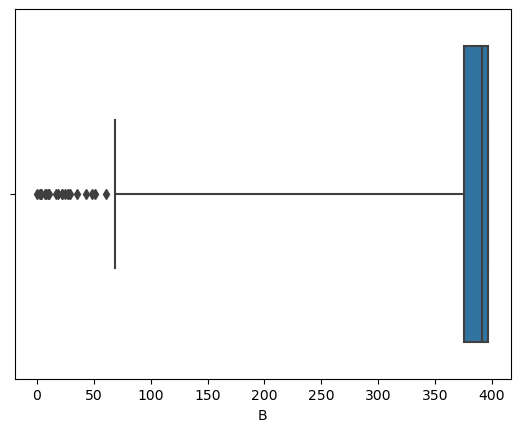

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
#sns.boxplot(x=boston_df['DIS']);
#sns.boxplot(x=boston_df['CRIM'], whis=15);
sns.boxplot(x=boston_df['B'], whis=15);
plt.show()

**Method 3: Visualizing Multi-Variables**

Scatter plots are good at identifying outliers since every data point is plotted. Can also identify data points that don't follow a general trend.

What conclusions can you draw from this plot?

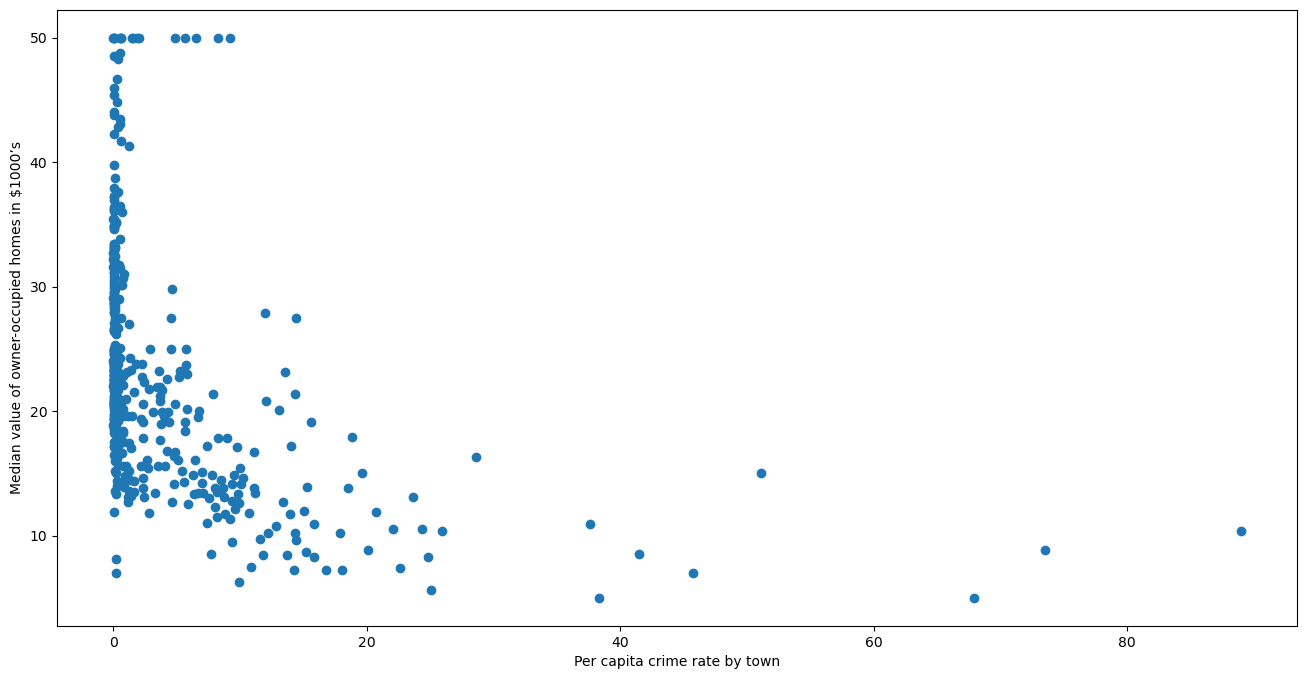

In [6]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(boston_df['CRIM'], y)
ax.set_xlabel('Per capita crime rate by town')
ax.set_ylabel('Median value of owner-occupied homes in $1000’s')
plt.show()

**Method 4: Z-Score**

A way to detect outliers is to remove values with a z-score greater than 3. The z-score is measured in terms of standard deviations from the mean.

$$
Z = \dfrac{x-\mu}{\sigma}
$$

- Z-score of 0 indicates the value is the mean
- Z-score of 1 indicates the value is within 1 standard deviation from the mean. 
- Z-score of 2 indicates the value is within 2 standard deviations from the mean.
- Z-score of 3 indicates the value is within 3 standard deviations from the mean.
- **Z-scores above 3 indicate the value is greater than 3 standard deviations from the mean. Data Scientists often label values with a z-score above 3 as outliers.**

In [7]:
from scipy import stats

#Finding Z Score on Column
stats.zscore(boston_df['ZN'])

#Turning Absolute
#np.abs(stats.zscore(boston_df['ZN']))

#view the outliers
boston_df['ZN'][(np.abs(stats.zscore(boston_df['ZN'])) > 3)]

55      90.0
56      85.0
57     100.0
199     95.0
200     95.0
201     82.5
202     82.5
203     95.0
204     95.0
256     90.0
283     90.0
284     90.0
347     85.0
353     90.0
Name: ZN, dtype: float64

### Dealing with Outliers

- Can drop the observation (if appropriate)
- Can fix the observation (e.g., obvious typo)
- Explore what caused the outlier

---
## 2. Handling Missing Values

Many times we will be handed data with missing data or corrupted data. Most commonly, missing data are represented as NaNs. NaNs are blank elements in Pandas. 

- It can be a system error that causes missing values, or it wasn't captured.
- There are techinques to deal with missing data, but all of them are imperfect. 

Resource: https://www.geeksforgeeks.org/working-with-missing-data-in-pandas/

### Null values: Demo
- Dataset: https://www.kaggle.com/uciml/pima-indians-diabetes-database/data#

In [ ]:
import pandas as pd
diabetes_df = pd.read_csv('data/diabetes.csv')
diabetes_df

In [ ]:
diabetes_df.isnull().sum()

In [ ]:
#Check percentage of data missing for each feature/column
round(100*(diabetes_df.isnull().sum()/len(diabetes_df)),2)

In [ ]:
diabetes_df.info()

### Null values: Summary of the data
- Sometimes null values aren't exactly NaNs
- They are encoded as -1 or 9999 etc.
- Sometimes it's 0. 
- Does 0 make sense for some of these categories??

In [ ]:
diabetes_df.describe()

### Null values: Encoding true NaNs as NaNs
- Won't be used in summary calculations (e.g., average, count)
- Some columns have a lot of what we think could be missing values

In [ ]:
cols_missing_vals = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI'] # cols with inappropriate 0s
(diabetes_df[cols_missing_vals] == 0).sum() # count number of 0s

In [ ]:
diabetes_df[cols_missing_vals] = diabetes_df[cols_missing_vals].replace(0, np.NaN) # replace 0's with NaNs
diabetes_df.isnull().sum()

### Null values: Dropping Missing Values
- Could be a good idea if there aren't too many records removed
- Let's do this for Glucose and BMI columns

In [ ]:
print("Shape before dropping NAs", diabetes_df.shape)

diabetes_df = diabetes_df.dropna(subset=['Glucose', 'BMI']) # drop rows with Glucose and BMI as NaN

print("Shape after dropping NAs for Glucose and BMI columns", diabetes_df.shape)

### Null values: using the average

In [ ]:
# Fill in missing values with the average (for SkinThickness)
diabetes_df['SkinThickness'] = diabetes_df['SkinThickness'].fillna(value=diabetes_df['SkinThickness'].mean())
diabetes_df.isnull().sum()

---
## 3. Data Preparation: Variable Transformation

- Basic transformations (e.g., logarithmic (making it more normally distributed))
- Binning (e.g., grouping numbers into bins)
- Scaling (e.g., setting everything between 0 and 1)
- Dummy variables (e.g., turning categories into multiple columns of binary variables) - BE CAREFUL

Will learn more when we get into `scikit-learn` library and dive into unsupervised and supervised learning.

### Log transformation

In [ ]:
#plot original distribution of Insulin
diabetes_df['Insulin'].plot.hist()

In [ ]:
#plot distribution of Insulin after log transformation
np.log(diabetes_df['Insulin']).plot.hist()

### Binning

In [ ]:
#Binning with q-cut (bin according to quantiles)
pd.qcut(diabetes_df['Age'], q = 4).value_counts()

In [ ]:
#Binning with cut (equally sized bins)
pd.cut(diabetes_df['Age'], bins = 4).value_counts()

### Scaling

In [ ]:
#summary statistics before scaling
diabetes_df.describe()

In [ ]:
#use MinMaxScaler to scale data into a given range ((0,1) by default)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled = pd.DataFrame(scaler.fit_transform(diabetes_df))

#summary statistics after scaling
scaled.describe()

### Convert a categorical feature into multiple dummy variables

In [ ]:
#Print Pregnancies column
diabetes_df['Pregnancies']

In [ ]:
#convert Pregnancies column into multiple dummy variables
pd.get_dummies(diabetes_df['Pregnancies'])

In [ ]:
#convert Pregnancies column into multiple dummy variables in the same dataframe
pd.get_dummies(diabetes_df, prefix='preg', columns=['Pregnancies'])

## Feature Engineering

- A key part to any DS Job is to figure out which parts are relevant to our desired outcome.
- The goal is to make the simplest model possible with the highest predictive power.
- Example: If we determine the cause of sales at a cafe is determined by two variables, price and the weather, we have a lot more predictive power and leverage than a model with thousands of variables.
- However, sometimes a thousand variable model is needed to explain the data.

- Feature engineering is like making an argument for an essay. There is a lot of things with varying relevance that can be included, the hard part is choosing the most relevant/correct ones, synthesizing different arguments into one. 

- The best features are domain and problem specific. 
- Good features ideally:
    - Capture most important aspects of a problem
    - allow learning with a few examples
    - generalize to new scenarios. 

**Feature engineering examples:**

- Taking a date and extracting out the week number, weekday, month etc.
    - Sales are often based on seasonality. 
- Taking freeform text (tweets) and extracting the number of words, hashtags, emojis, and counts of words etc.
    -  Text "metadata' can sometimes help with sentiment anlaysis
    
- Take geographical coordintes and getting continent, country, urban vs. rural.
    - Housing price can depend on features extracted from geographical coordinates.
- Predicting NBA games, we might extract the stats of the players, and coaches, and maybe look at the recent games. Home or Away games. 


**Feature Engineering vs. Feature Selection**

Through feature engineering we usually add more features to our data to make it more complex. In Feature selection, we are trying to choose thevbest features and remove features that do not add anything to our model. One common method is to remove features that have a low variance. 

### Feature Engineering Exercise (5-10 minutes)

You're presented with the data below.

Think of at least 5 features you might add.

**Note: For this exercise you will be creating new columns.**

In [ ]:
import pandas as pd
import numpy as np

retail_df = pd.DataFrame([['Protein Bar','25-01-2021', 2.99, 1024, 1],\
              ['Oat Milk','25-01-2021', 3.99, 729, 1],\
              ['Banana','25-01-2021', 1.99, 256, 1]],\
            columns=['Item', 'Date', 'Price', 'Sales', 'Store Id'])

retail_df.loc[:,'Date'] = pd.to_datetime(retail_df['Date'])
retail_df.head()